### SEIR simple 2

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [3]:
class SEIRModel:
    def __init__(self, N, I0=0, E0=0, R0=0):
        self.N = N
        self.I0 = I0
        self.E0 = E0
        self.R0 = R0
        self.S0 = N - E0 - I0 - R0
        self.y0 = self.S0, self.E0, self.I0, self.R0
        self.results = None

    def _seir_equations(self, y, t, beta, sigma, gamma):
        S, E, I, R = y
        dSdt = -beta * S * I / self.N
        dEdt = beta * S * I / self.N - sigma * E
        dIdt = sigma * E - gamma * I
        dRdt = gamma * I
        return dSdt, dEdt, dIdt, dRdt

    def integrate(self, beta, sigma, gamma, days=365):
        t = np.linspace(0, days, days)
        ret = odeint(self._seir_equations, self.y0, t, args=(beta, sigma, gamma))
        self.results = {'S': ret[:, 0], 'E': ret[:, 1], 'I': ret[:, 2], 'R': ret[:, 3], 't': t}
        return self.results

    def plot(self):
        if self.results is None:
            raise ValueError("Please integrate the model first using the 'integrate' method.")
        
        t, S, E, I, R = self.results['t'], self.results['S'], self.results['E'], self.results['I'], self.results['R']
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
        ax.plot(t, E, 'y', alpha=0.5, lw=2, label='Exposed')
        ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
        ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered')
        ax.set_xlabel('Time /days')
        ax.set_ylabel('Number')
        ax.set_ylim(0, self.N+100)
        ax.legend()
        plt.title("SEIR Model")
        plt.show()


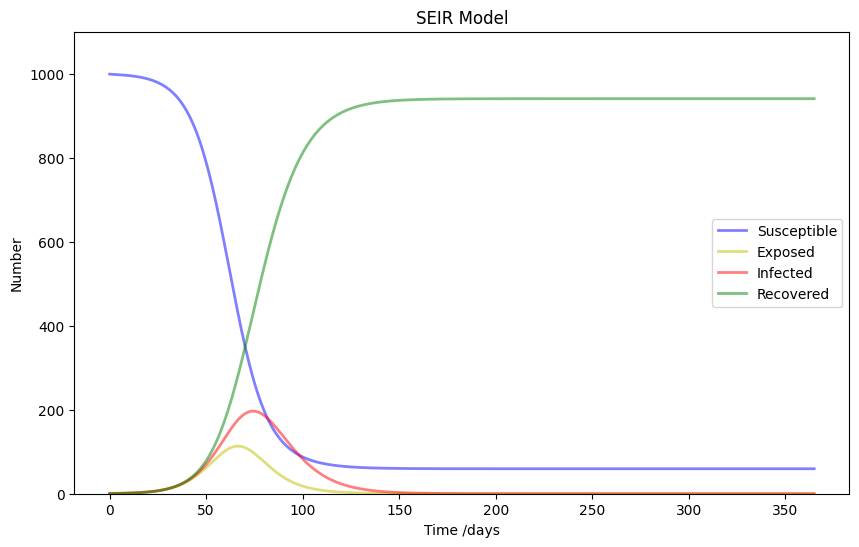

In [4]:
# Testing the SEIRModel class
model_A = SEIRModel(N=1000, I0=1)
model_A.integrate(beta=0.3, sigma=1./5., gamma=1./10.)
model_A.plot()